<a href="https://www.kaggle.com/code/alexandrenouarcto/nvidia-guide-ai?scriptVersionId=209302482" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [82]:
# This Python 3 environment comes with many helpful analytics libraries installed

# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

# For example, here's several helpful packages to load



import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



# Input data files are available in the read-only "../input/" directory

# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



import os

for dirname, _, filenames in os.walk('/kaggle/input'):

    for filename in filenames:

        print(os.path.join(dirname, filename))



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gpu_cleaned.csv


In [83]:
# Remove duplicates and reset PATH
java_bin = "/usr/lib/jvm/jdk-11/bin"
os.environ["PATH"] = f"{java_bin}:{':'.join([p for p in os.environ['PATH'].split(':') if p != java_bin])}"

#print("Cleaned PATH:", os.environ["PATH"])

os.environ["JAVA_HOME"] = "/usr/lib/jvm/jdk-11"
os.environ["PATH"] = f"{os.environ['JAVA_HOME']}/bin:{os.environ['PATH']}"

#print("JAVA_HOME:", os.environ["JAVA_HOME"])
#print("PATH:", os.environ["PATH"])

In [84]:
import subprocess

import numpy as np

import pandas as pd

import gc

import ctypes

import matplotlib.pyplot as plt

import seaborn as sns



# Deep Learning Libraries

import tensorflow as tf

from tensorflow import keras

from tensorflow.keras import backend as K, Model, Input, layers

from tensorflow.keras.models import Sequential, Model, load_model

from tensorflow.keras.layers import (Dense, Dropout, Conv1D, BatchNormalization, ReLU, MaxPooling1D, 

                                   GlobalAveragePooling1D, Add, Concatenate, Input, LayerNormalization, 

                                   MultiHeadAttention, Flatten, Reshape, LeakyReLU, Activation, Lambda, Layer)

from tensorflow.keras.backend import clear_session

from tensorflow.keras.losses import MeanSquaredError

from tensorflow.keras.metrics import RootMeanSquaredError, Metric

from tensorflow.keras.optimizers import Adam, RMSprop, Adamax

from tensorflow.keras.callbacks import EarlyStopping, Callback, LearningRateScheduler

from tensorflow.keras.mixed_precision import Policy, set_global_policy

from tensorflow.keras.regularizers import l2, l1_l2

from tensorflow.data import Dataset

from keras import mixed_precision



# Machine Learning Libraries

from sklearn.cluster import DBSCAN

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import NearestNeighbors

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, confusion_matrix

from sklearn.model_selection import train_test_split, KFold

from sklearn.preprocessing import StandardScaler as sklearn_StandardScaler



# PySpark Libraries

from pyspark.sql import SparkSession

from pyspark.sql.functions import col, udf, monotonically_increasing_id, mean, stddev, when

from pyspark.sql.types import ArrayType, FloatType, IntegerType, DoubleType, StringType

from pyspark.ml.feature import (StringIndexer, OneHotEncoder, VectorAssembler as SparkVectorAssembler, 

                               MinMaxScaler as SparkMinMaxScaler, RobustScaler, 

                               StandardScaler as SparkStandardScaler, PCA as SparkPCA)

from pyspark.ml import Pipeline

from pyspark.ml.linalg import Vectors, DenseVector

from pyspark.ml.regression import RandomForestRegressor

from pyspark.ml.evaluation import RegressionEvaluator

from pyspark.ml.tuning import CrossValidator, ParamGridBuilder



# Hyperparameter Tuning Libraries

import keras_tuner as kt

from keras_tuner import HyperParameters, Hyperband

import optuna

from optuna.integration import TFKerasPruningCallback



# GPU Acceleration

from numba import cuda



# Visualization Libraries

import matplotlib.pyplot as plt

import seaborn as sns



# Utility Libraries

import logging

from termcolor import colored

from math import sqrt

from itertools import count

# 🎮 *NVIDIA GPU GUIDE FOR KAGGLE* 🚀



## 🌟 A Magical Journey Through GPU Computing 🌟



![NVIDIA RTX](https://img.shields.io/badge/NVIDIA-RTX-76B900?style=for-the-badge&logo=nvidia&logoColor=white)







## 🎯 Choose Your Path:







### 1. 🎮 The Gamer's Quest



- Level up from gaming to ML/Data Science mastery



- Harness your GPU's hidden potential







### 2. 🤖 The AI Engineer's Saga 



- From development to production deployment



- Craft powerful AI solutions







### 3. ⚡ The HPC Wizard's Chronicle



- Master the art of High Performance Computing



- Unlock unprecedented computational power







### 4. 🔥 The Enthusiast's Adventure



- Push boundaries with extreme overclocking



- Pioneer cutting-edge AI research







![GPU Architecture](https://img.shields.io/badge/CUDA-Powered-76B900?style=for-the-badge&logo=nvidia&logoColor=white)

In [85]:
# Initialize Spark session for the master node
# 1 - Use all available local cores for the master node
# 2 - Set the application name for the master node
# 3 - Configure the driver and executor memory and GPU settings
import subprocess
import json


# ======================================================================================================#
# =========================================[INIT SPARK]=================================================#
# ======================================================================================================#

# Configure Spark with GPU settings for RTX 4090 (24GB) and A5000 (24GB)
spark = SparkSession.builder \
    .master("local[*]") \
    .appName("ERROR 418 - I'M A TEAPOT") \
    .config("spark.driver.memory", "48g") \
    .config("spark.executor.memory", "48g") \
    .config("spark.driver.maxResultSize", "48g") \
    .config("spark.rapids.sql.enabled", "true") \
    .config("spark.rapids.memory.pinnedPool.size", "24G") \
    .config("spark.rapids.sql.concurrentGpuTasks", "2") \
    .config("spark.rapids.memory.gpu.pooling.enabled", "true") \
    .config("spark.rapids.memory.gpu.allocFraction", "0.95") \
    .config("spark.rapids.sql.explain", "ALL") \
    .config("spark.executor.resource.gpu.amount", "2") \
    .config("spark.task.resource.gpu.amount", "0.25") \
    .config("spark.rapids.sql.incompatibleOps.enabled", "true") \
    .config("spark.rapids.memory.host.spillStorageSize", "42G") \
    .config("spark.sql.adaptive.enabled", "true") \
    .config("spark.sql.adaptive.coalescePartitions.enabled", "true") \
    .config("spark.sql.adaptive.localShuffleReader.enabled", "true") \
    .config("spark.rapids.memory.gpu.maxAllocFraction", "0.95") \
    .config("spark.rapids.sql.batchSizeBytes", "512M") \
    .config("spark.rapids.sql.reader.batchSizeRows", "10000") \
    .config("spark.rapids.sql.variableRowGroupSize.enabled", "true") \
    .getOrCreate()

# Set log level to INFO
spark.sparkContext.setLogLevel("INFO")
# Configure logging
log4jLogger = spark._jvm.org.apache.log4j
logger = log4jLogger.LogManager.getLogger(__name__)

def custom_logger(level, message):
    color = 'white'
    if level == "INFO":
        color = 'cyan'
    elif level == "SUCCESS":
        color = 'green'
    elif level == "ERROR":
        color = 'red'
    elif level == "ACTION":
        color = 'blue'
    elif level == "PROGRESS" or level == "WARNING":
        color = 'yellow'
    elif level == "FINAL":
        color = 'magenta'
    logger.info(colored(f"SPARK: {level} - {message}", color))

# ======================================================================================================#
# =========================================[INIT CUDA]==================================================#
# ======================================================================================================#

# TF_GPU_ALLOCATOR: Controls the GPU memory allocator used by TensorFlow
# Setting to 'cuda_malloc_async' enables asynchronous memory allocation for better performance
os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'

# TF_FORCE_GPU_ALLOW_GROWTH: Controls whether TensorFlow allocates all GPU memory at once
# Setting to 'true' makes memory allocation grow as needed instead of taking all at startup
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

# CUDA_DEVICE_ORDER: Determines how CUDA devices are ordered
# "PCI_BUS_ID" makes CUDA devices ordered by their PCI bus IDs for consistent device numbering
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"

# CUDA_VISIBLE_DEVICES: Specifies which GPUs are visible to the application
# "0, 1" makes only GPUs 0 and 1 visible to the application
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"

def initialize_cuda():
    """
    Initializes CUDA and returns handles for all available devices.
    
    Returns:
        list: List of device handles
    """
    # Load the CUDA library
    cuda = ctypes.CDLL('libcuda.so')
    
    # Set up cuInit function for CUDA initialization
    cuInit = cuda.cuInit
    cuInit.restype = ctypes.c_int
    cuInit.argtypes = [ctypes.c_uint]
    
    # Set up cuDeviceGetCount function to get number of CUDA devices
    cuDeviceGetCount = cuda.cuDeviceGetCount
    cuDeviceGetCount.restype = ctypes.c_int
    cuDeviceGetCount.argtypes = [ctypes.POINTER(ctypes.c_int)]
    
    # Set up cuDeviceGet function to get handle to specific device
    cuDeviceGet = cuda.cuDeviceGet
    cuDeviceGet.restype = ctypes.c_int
    cuDeviceGet.argtypes = [ctypes.POINTER(ctypes.c_int), ctypes.c_int]

    # Initialize CUDA driver API
    res = cuInit(0)
    if res != 0:
        raise RuntimeError("Failed to initialize CUDA")
        
    # Get count of available CUDA devices
    device_count = ctypes.c_int()
    res = cuDeviceGetCount(ctypes.byref(device_count))
    if res != 0:
        raise RuntimeError("Failed to get device count")
        
    # Get handles for all available devices
    devices = []
    for i in range(device_count.value):
        device = ctypes.c_int()
        res = cuDeviceGet(ctypes.byref(device), i)
        if res != 0:
            raise RuntimeError(f"Failed to get device {i}")
        devices.append(device.value)
    return devices

def allocate_gpu_memory(size):
    """
    Allocates GPU memory of a given size.
    
    Args:
        size (int): Size of memory to allocate in bytes
        
    Returns:
        int: Pointer to the allocated memory
    """
    # Load CUDA library
    cuda = ctypes.CDLL('libcuda.so')
    
    # Set up memory allocation function
    cuda_malloc = cuda.cuMemAlloc
    cuda_malloc.restype = ctypes.c_int
    cuda_malloc.argtypes = [ctypes.POINTER(ctypes.c_ulonglong), ctypes.c_ulonglong]
    
    # Allocate memory on GPU
    ptr = ctypes.c_ulonglong()
    res = cuda_malloc(ctypes.byref(ptr), size)
    if res != 0:
        raise RuntimeError("Failed to allocate GPU memory")
    return ptr.value

def free_gpu_memory(ptr):
    """
    Frees GPU memory allocated by allocate_gpu_memory.
    
    Args:
        ptr (int): Pointer to the allocated memory
    """
    # Load CUDA library
    cuda = ctypes.CDLL('libcuda.so')
    
    # Set up memory deallocation function
    cuda_free = cuda.cuMemFree
    cuda_free.restype = ctypes.c_int
    cuda_free.argtypes = [ctypes.c_ulonglong]
    
    # Free allocated GPU memory
    res = cuda_free(ptr)
    if res != 0:
        raise RuntimeError("Failed to free GPU memory")

# Check GPU memory usage
def check_gpu_memory():
    """
    Checks GPU memory usage by running nvidia-smi command.
    """
    os.system('nvidia-smi')

# Set the environment variable for XLA flags
os.environ['XLA_FLAGS'] = '--xla_gpu_strict_conv_algorithm_picker=false'

# ======================================================================================================
# ==============================[SETUP MIRROREDSTRATEGY WITHOUT NCCL]===================================
# ======================================================================================================

# ------------------------------------------------------------------------------------------------------
# Define the strategy with HierarchicalCopyAllReduce to avoid NCCL
# ------------------------------------------------------------------------------------------------------
strategy = tf.distribute.MirroredStrategy(
    devices=["/gpu:0", "/gpu:1"],
    cross_device_ops=tf.distribute.HierarchicalCopyAllReduce()
)

print(f"Number of devices under strategy: {strategy.num_replicas_in_sync}")

Number of devices under strategy: 2


### **LazyEval EDA**

In [86]:
# Load and analyze GPU dataset
def load_gpu_dataset():
    """
    Load the GPU dataset from either Kaggle or local path.
    Returns:
        pd.DataFrame: Loaded GPU dataset
    """
    kaggle_path = '/kaggle/input/gpu_cleaned.csv'
    local_path = '/home/skander/datasets/gpu/Updated_GPU_Dataset_with_Tensor_Core_Information copy.csv'
    
    try:
        # Try Kaggle path first
        custom_logger("INFO", "Attempting to load from Kaggle path...")
        data = pd.read_csv(kaggle_path, index_col=False, header=0)
        custom_logger("SUCCESS", "Dataset loaded successfully from Kaggle")
        return data
    except FileNotFoundError:
        try:
            # Try local path if Kaggle fails
            custom_logger("INFO", "Kaggle path failed. Attempting local path...")
            data = pd.read_csv(local_path, index_col=False, header=0)
            custom_logger("SUCCESS", "Dataset loaded successfully from local path")
            return data
        except FileNotFoundError:
            custom_logger("ERROR", "Both Kaggle and local paths failed. Please check file paths.")
            return None

def univariate_analysis(df):
    """
    Perform comprehensive univariate analysis on the DataFrame.
    
    Args:
        df (pd.DataFrame): Input DataFrame for analysis
        
    Prints:
        - Basic dataset information (shape, dtypes)
        - Missing value analysis
        - Duplicate entry analysis
        - Numerical column statistics
        - Detailed NaN value report
    """
    custom_logger("ACTION", "Starting univariate analysis...")
    
    # Dataset overview
    custom_logger("INFO", f"Dataset Shape: {df.shape}")
    custom_logger("INFO", "\nData Types:")
    print(df.dtypes)
    
    # Missing values analysis
    missing_values = df.isnull().sum()
    custom_logger("INFO", "\nMissing Values Summary:")
    print(missing_values)
    
    # Duplicate analysis
    duplicate_count = df.duplicated().sum()
    custom_logger("INFO", f"\nNumber of Duplicate Entries: {duplicate_count}")
    
    # Numerical statistics
    custom_logger("INFO", "\nNumerical Column Statistics:")
    print(df.describe(include=[np.number]))
    
    # Detailed NaN analysis
    custom_logger("INFO", "\nDetailed NaN Value Analysis:")
    for col in df.columns:
        if df[col].isnull().any():
            nan_count = df[col].isnull().sum()
            nan_percentage = df[col].isnull().mean() * 100
            custom_logger("WARNING", f"Column '{col}': {nan_count} NaN values ({nan_percentage:.2f}%)")
    
    custom_logger("FINAL", "Univariate analysis completed")

# Execute the analysis
original_data = load_gpu_dataset()
if original_data is not None:
    custom_logger("INFO", "ORIGINAL DATA - BEFORE PROCESSING")
    univariate_analysis(original_data)


model                   object
price                  float64
market                  object
ecc_equipped            object
architecture            object
release_date            object
tensor_cores             int64
tensor_core_gen         object
cuda_cores              object
base_clock_mhz          object
max_boost_clock_mhz     object
bus_type                object
bus_width               object
vram                     int64
clock_speed             object
bandwith                object
fp16                    object
fp32                    object
fp64                    object
tdp                      int64
nv_link                 object
bus_interface           object
L2 Cache (MB)          float64
Notes                   object
profile                 object
slot                    object
eol                     object
eol_date                object
dtype: object
model                   0
price                   0
market                  0
ecc_equipped            0
architecture  

24/11/24 07:10:47 INFO __main__: SPARK: INFO - Attempting to load from Kaggle path...
24/11/24 07:10:47 INFO __main__: SPARK: SUCCESS - Dataset loaded successfully from Kaggle
24/11/24 07:10:47 INFO __main__: SPARK: INFO - ORIGINAL DATA - BEFORE PROCESSING
24/11/24 07:10:47 INFO __main__: SPARK: ACTION - Starting univariate analysis...
24/11/24 07:10:47 INFO __main__: SPARK: INFO - Dataset Shape: (66, 28)
24/11/24 07:10:47 INFO __main__: SPARK: INFO - 
Data Types:
24/11/24 07:10:47 INFO __main__: SPARK: INFO - 
Missing Values Summary:
24/11/24 07:10:47 INFO __main__: SPARK: INFO - 
Number of Duplicate Entries: 0
24/11/24 07:10:47 INFO __main__: SPARK: INFO - 
Numerical Column Statistics:
24/11/24 07:10:47 INFO __main__: SPARK: INFO - 
Detailed NaN Value Analysis:
24/11/24 07:10:47 INFO __main__: SPARK: WARNING - Column 'L2 Cache (MB)': 39 NaN values (59.09%)
24/11/24 07:10:47 INFO __main__: SPARK: WARNING - Column 'Notes': 27 NaN values (40.91%)
24/11/24 07:10:47 INFO __main__: SPARK: 

### **Lack of features - adding Tensor Cores, Generation, and End-of-Life**

In [89]:
df = original_data

# Removing commas and converting columns to float
columns_to_clean = ["cuda_cores", "base_clock_mhz", "tdp", "fp16", "fp32", "fp64", "bandwith"]

for column in columns_to_clean:
    if df[column].dtype == 'object':  # Check if the column is a string
        df[column] = df[column].str.replace(",", "").astype(float)
    else:
        df[column] = df[column].astype(float)

def dataset_info(df, name):
    info = {
        "Head": df.head(),
        "Tail": df.tail(),
        "Shape": df.shape,
        "Data Types": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Duplicates": df.duplicated().sum()
    }
    print(f"Dataset: {name}")
    for key, value in info.items():
        print(f"\n{key}:\n{value}")
    print("\n" + "="*40 + "\n")

# Display information for each dataset
dataset_info(df, "tech specs")

# Copy the datasets to avoid any issues with the original data
df_cleaned = df.copy()

Dataset: tech specs

Head:
                     model     price        market     ecc_equipped  \
0  RTX 6000 Ada Generation   7198.00  Professional              Yes   
1                Tesla L40   8627.99    Datacenter              Yes   
2         GeForce RTX 4090   1948.99      Consumer  Partial Support   
3  RTX 5000 Ada Generation   4499.99  Professional              Yes   
4               Tesla H100  40745.00    Datacenter              Yes   

   architecture release_date  tensor_cores   tensor_core_gen  cuda_cores  \
0  Ada Lovelace    12/3/2022           568     4th Gen (Ada)     18176.0   
1  Ada Lovelace         8322           568     4th Gen (Ada)     18176.0   
2       TSMC 4N         4679           512     4th Gen (Ada)     18176.0   
3  Ada Lovelace     8/9/2023           400     4th Gen (Ada)     12800.0   
4        Hopper    3/22/2022           640  4th Gen (Hopper)     14592.0   

   base_clock_mhz  ...     fp64    tdp       nv_link  bus_interface  \
0           915.0 

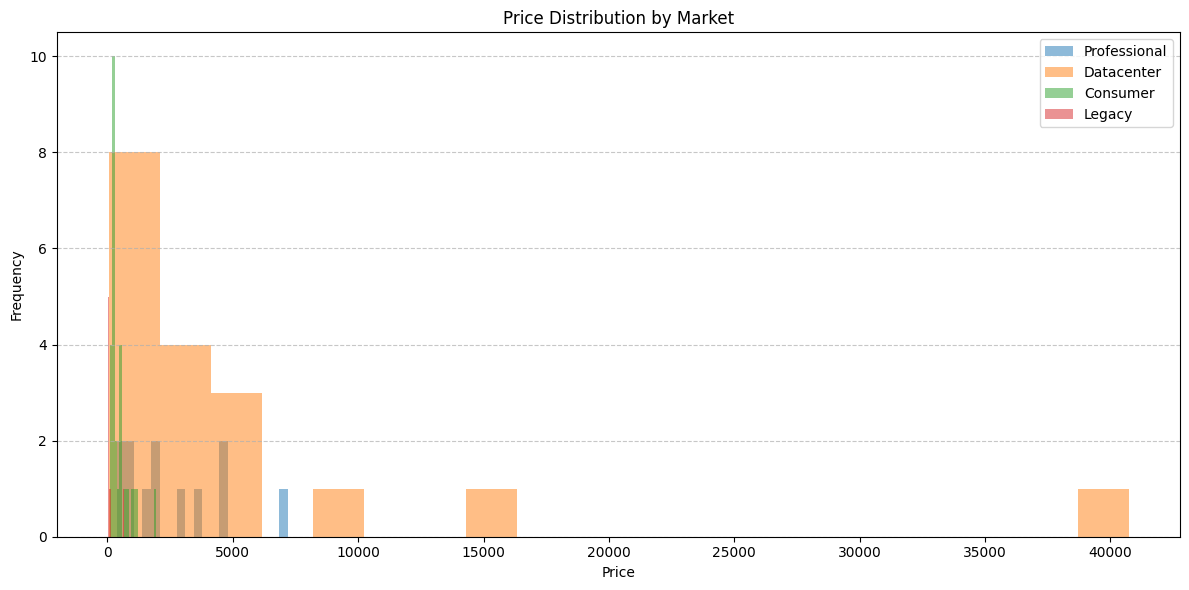

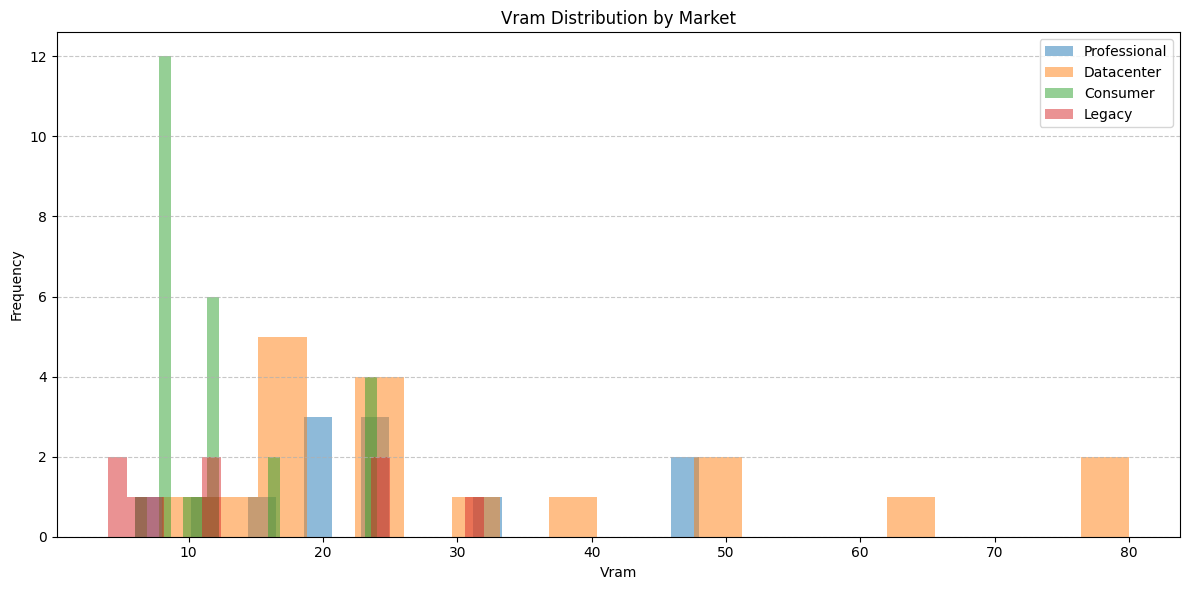

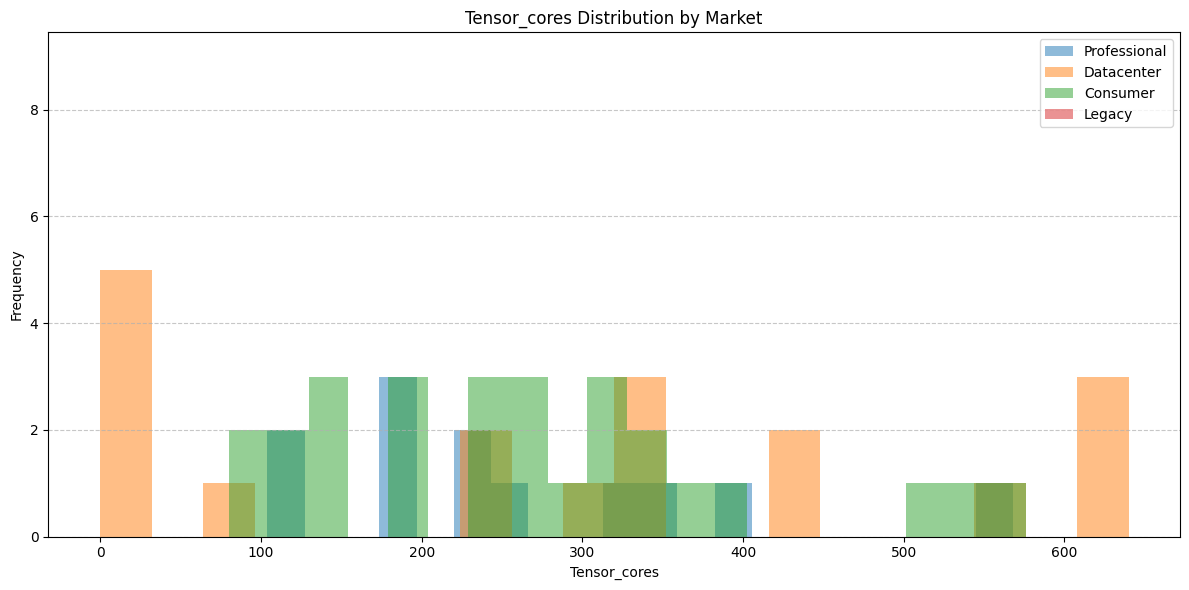

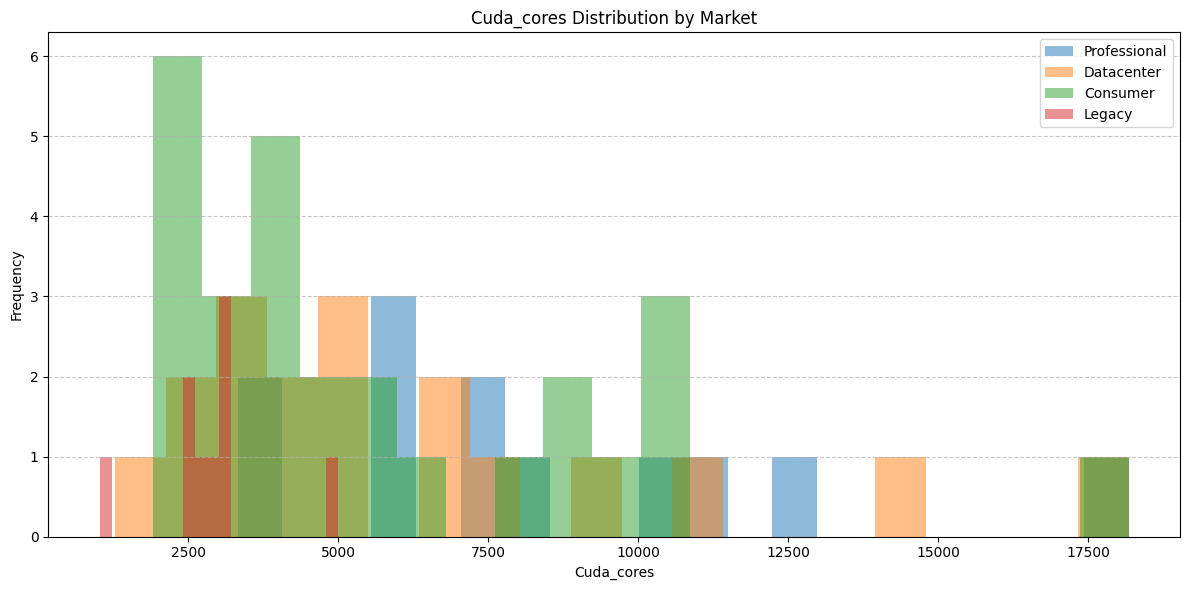

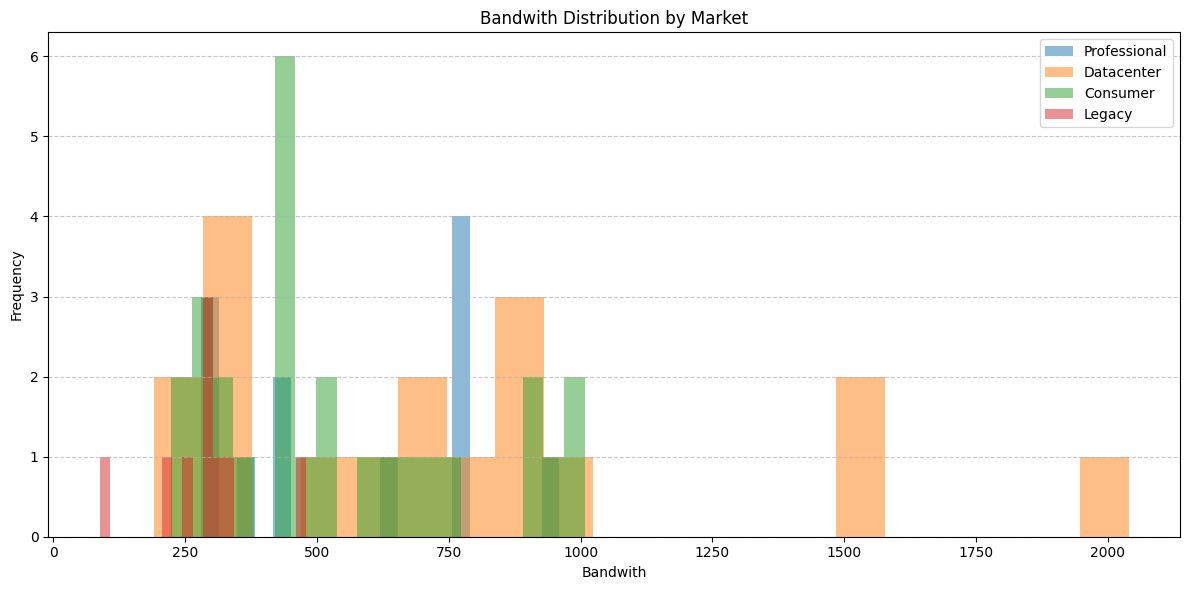

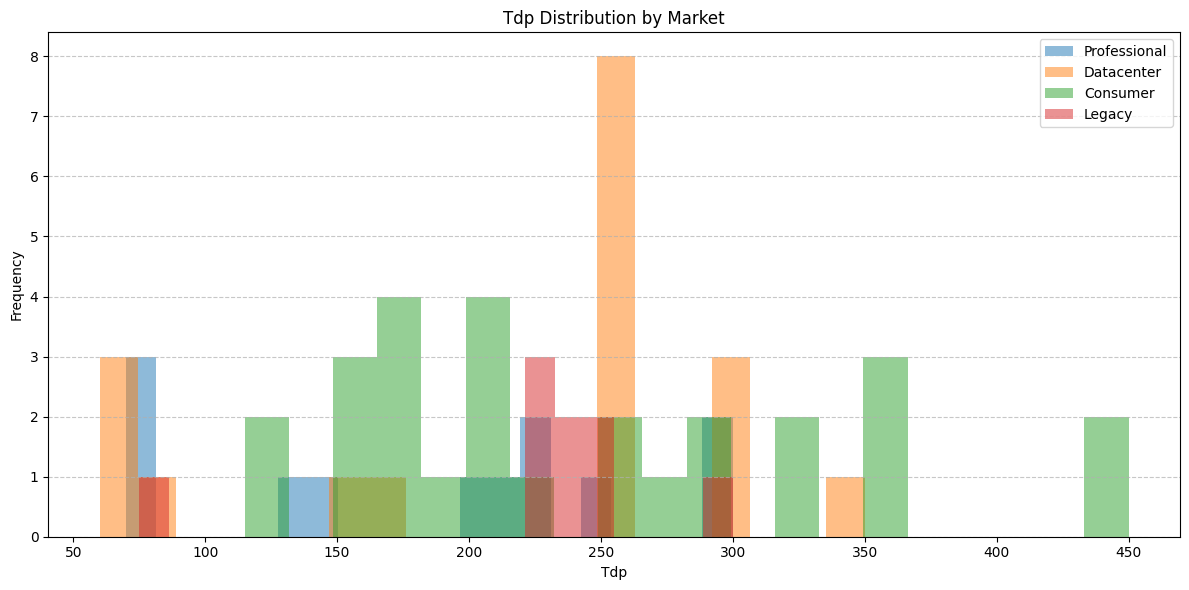

In [90]:

# Safely process the 'cuda_cores' column
if df_cleaned['cuda_cores'].dtype == 'object':  # Check if it's a string
    df_cleaned['cuda_cores'] = df_cleaned['cuda_cores'].str.replace(',', '').astype(float)
else:
    df_cleaned['cuda_cores'] = df_cleaned['cuda_cores'].astype(float)

# List of numeric columns to analyze
columns_to_analyze = ['price', 'vram', 'tensor_cores', 'cuda_cores', 'bandwith', 'tdp']

# List of unique markets
markets = df_cleaned['market'].unique()

# Loop through each column and create visualizations per market
for col in columns_to_analyze:
    plt.figure(figsize=(12, 6))
    for market in markets:
        subset = df_cleaned[df_cleaned['market'] == market]
        plt.hist(subset[col], bins=20, alpha=0.5, label=market)
    plt.title(f'{col.capitalize()} Distribution by Market')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 🎮 GPU Market Analysis: Your Ultimate Guide! 



## For Gamers 🎯

Hey gamers! Here's what you need to know:



### Price & Performance Sweet Spots 💰

- Most gaming GPUs cluster under $2,000 - perfect for high-end builds!

- The RTX 4090 is the current king but comes at a premium

- Great value found in mid-range cards ($500-$1000)



### What Really Matters for Gaming 🏆

- VRAM: 8-16GB is the sweet spot for modern games

- High memory bandwidth for those sweet FPS

- CUDA cores still important for raw gaming performance

- Look for cards with good DLSS support (Tensor cores help!)



### Power & Cooling Tips ⚡

- Gaming cards can be power hungry (especially high-end models)

- Make sure your PSU can handle the peaks

- Consider case airflow for these hot performers!



---



## For AI/ML Enthusiasts 🤖

Ready to train some models? Check this out:



### Key Specs for ML Work 📊

- VRAM is king! Look for 24GB+ for serious work

- Tensor cores are your best friend

- High memory bandwidth helps training speed



### Best Options 🎯

- Datacenter cards (A100, H100) are dream machines but $$$

- Professional cards offer good balance

- Some consumer cards (4090) can handle smaller models



### Cost-Performance Tips 💡

- Consider multiple consumer cards vs one datacenter card

- Watch for cards with good FP16/BF16 support

- Memory bandwidth per dollar is crucial



---



## For HPC Warriors 🚀

Running serious computations? Here's your guide:



### Critical Features ⚡

- ECC memory support for reliability

- FP64 performance for scientific computing

- Stable power draw for datacenter deployment



### Market Analysis 📈

- Datacenter GPUs dominate this space

- Professional cards offer workstation-friendly options

- Consumer cards generally lack required features



### Deployment Considerations 🔧

- Power efficiency is crucial at scale

- Look for cards with good virtualization support

- Consider cooling requirements in dense setups



---



## For Hardware Enthusiasts 🔧

Love the technical details? Let's geek out!



### Architecture Deep Dive 🎛️

- Latest gen brings massive improvements in Tensor cores

- Memory tech evolving: GDDR6X vs HBM2e

- Power delivery systems getting more sophisticated



### Interesting Trends 📊

- Consumer cards catching up on compute features

- Professional cards filling the middle ground

- Legacy cards showing interesting price/performance ratios



### Future Watch 🔮

- Next-gen memory bandwidth improvements coming

- AI acceleration becoming standard

- Power efficiency vs performance battle continues



---



## 🌟 Quick Decision Guide



### Choose Gaming if you need:

- High FPS in latest games

- Great price/performance ratio

- DLSS/RT features



### Choose AI/ML if you need:

- Large VRAM pools

- Top tensor performance

- Training flexibility



### Choose HPC if you need:

- ECC memory

- FP64 performance

- Deployment reliability



### Choose Professional if you need:

- Balance of features

- Certified drivers

- Workstation reliability



## 🎯 Next Steps

1. **Compare Your Use Case**

   - Match your needs to the right category

   - Consider hybrid use cases

   

2. **Budget Planning**

   - Set realistic expectations

   - Consider TCO (Total Cost of Ownership)

   

3. **Stay Updated**

   - Watch for new releases

   - Monitor price trends

   - Keep an eye on emerging technologies



Happy GPU hunting! 🚀


In [92]:
# Convert numeric columns

numeric_cols = ['bandwith', 'fp16', 'fp32', 'fp64', 'tdp']

for col in numeric_cols:

    # First convert to string, handle any non-numeric values, then convert to float

    df_cleaned[col] = pd.to_numeric(

        df_cleaned[col].astype(str).replace(',', '', regex=True),

        errors='coerce'

    )


# 🚀 Tensor Core Evolution: Powering the AI Revolution

# 

# Let's explore how NVIDIA's Tensor Core technology has evolved across generations and markets,

# revolutionizing both AI/ML workloads and gaming performance through mixed-precision computing.

#


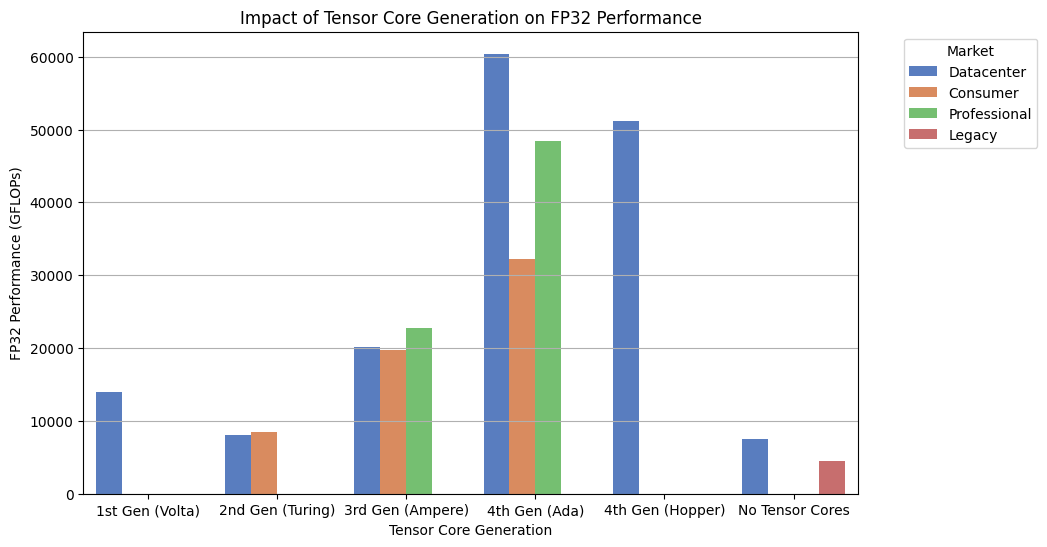

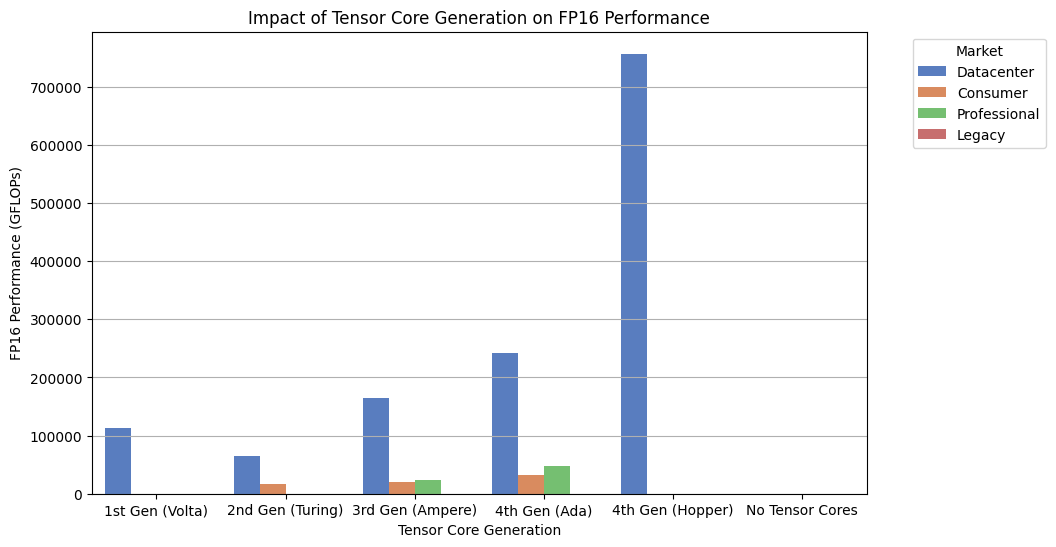

In [93]:
# Convert numeric columns before grouping

numeric_cols = ['fp32', 'tensor_cores', 'cuda_cores', 'bus_width', 'bandwith', 'fp64', 'tdp', 'price', 'fp16']

df_numeric = df_cleaned.copy()



for col in numeric_cols:

    # Remove any non-numeric characters and convert to numeric

    df_numeric[col] = df_numeric[col].replace(r'[^\d.]', '', regex=True)

    df_numeric[col] = pd.to_numeric(df_numeric[col], errors='coerce')



# Group by Tensor Core generation and market, only aggregating numeric columns

tensor_core_impact = df_numeric.groupby(['tensor_core_gen', 'market'], as_index=False)[numeric_cols].mean()



# Plot FP32 performance by Tensor Core generation

plt.figure(figsize=(10, 6))

sns.barplot(

    data=tensor_core_impact,

    x='tensor_core_gen', 

    y='fp32',

    hue='market',

    palette='muted'

)

plt.title('Impact of Tensor Core Generation on FP32 Performance')

plt.xlabel('Tensor Core Generation')

plt.ylabel('FP32 Performance (GFLOPs)')

plt.legend(title='Market', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(axis='y')

plt.show()





# Plot FP16 performance by Tensor Core generation

plt.figure(figsize=(10, 6))

sns.barplot(

    data=tensor_core_impact,

    x='tensor_core_gen', 

    y='fp16',

    hue='market',

    palette='muted'

)

plt.title('Impact of Tensor Core Generation on FP16 Performance')

plt.xlabel('Tensor Core Generation')

plt.ylabel('FP16 Performance (GFLOPs)')

plt.legend(title='Market', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(axis='y')

plt.show()

# Analysis of Tensor Core Impact Across User Segments



## Gaming Users

- Tensor cores primarily benefit DLSS (Deep Learning Super Sampling) for higher FPS and resolution upscaling

- 2nd Gen (Turing) and newer provide meaningful gaming benefits through DLSS 2.0/3.0

- Most gamers don't need the extreme FP32/FP16 performance of datacenter cards

- Sweet spot is RTX 30/40 series consumer cards with 3rd/4th gen tensor cores



## AI/ML Users

- Dramatic FP16 speedup from tensor cores essential for training/inference

- 4th Gen (Ada Lovelace) shows massive ~60,000 GFLOPS FP32 in datacenter segment

- Professional cards (A-series) balance memory and compute for development

- Datacenter cards (H100 etc) optimal for large-scale training



## HPC Users

- Need maximum FP64 performance which tensor cores don't directly accelerate

- Still benefit from mixed precision training using tensor cores

- Datacenter cards with 4th/5th gen cores provide best performance

- Memory bandwidth and size often more important than raw tensor performance



## Hardware Enthusiasts

- Can see clear generational improvements in tensor core capabilities

- 4th gen shows biggest leap in both consumer and datacenter segments

- Professional cards offer good balance of features for experimentation

- Latest consumer cards (4090 etc) provide excellent price/performance



Key Observations:

- Each tensor core generation roughly doubles performance

- Datacenter cards show highest absolute performance

- Consumer cards focus on gaming/content creation

- Professional cards balance various workloads

- Legacy cards lack tensor cores entirely


# Exploring the Relationship Between CUDA Cores and FP32 Performance: A Deep Dive into NVIDIA's Raw Computing Power


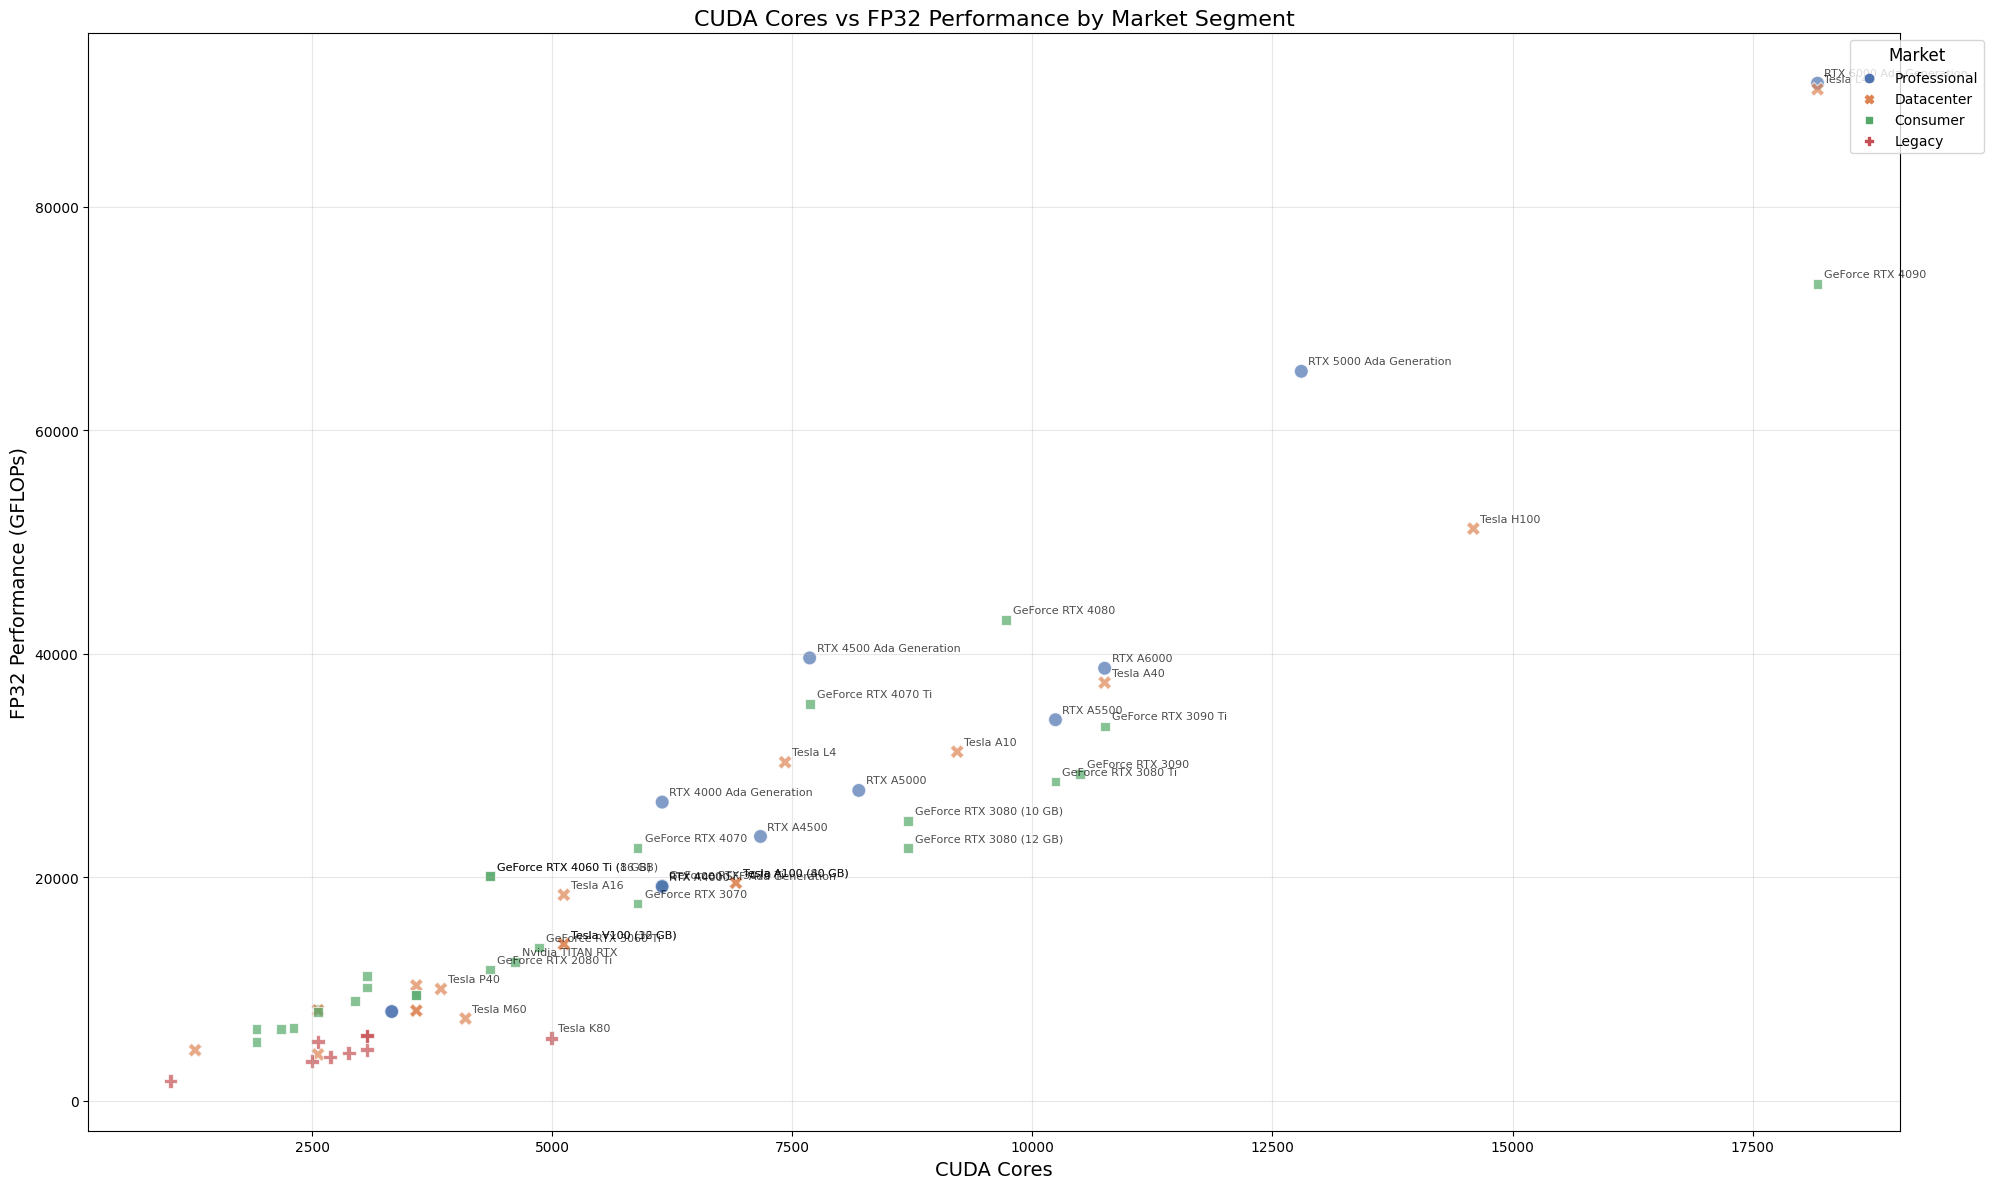

In [99]:
# Scatter plot for CUDA Cores vs FP32 performance

plt.figure(figsize=(20, 12), dpi=100)



sns.scatterplot(

    data=df_cleaned.sort_values('fp32', ascending=False),  # Sorted FP32

    x='cuda_cores',

    y='fp32',

    hue='market',

    style='market',

    palette='deep',

    alpha=0.7,

    s=100

)



# Add GPU model labels for significant points

for idx, row in df_cleaned.iterrows():

    if row['cuda_cores'] > 3600 or row['fp32'] > 30000:

        plt.annotate(

            row['model'],

            (row['cuda_cores'], row['fp32']),

            xytext=(5, 5),

            textcoords='offset points',

            fontsize=8,

            alpha=0.7

        )



# Customize the plot

plt.title('CUDA Cores vs FP32 Performance by Market Segment', fontsize=16)

plt.xlabel('CUDA Cores', fontsize=14)

plt.ylabel('FP32 Performance (GFLOPs)', fontsize=14)

plt.grid(True, alpha=0.3)

plt.legend(title='Market', title_fontsize=12, fontsize=10, bbox_to_anchor=(1.05, 1))



# Adjust layout

plt.tight_layout()



# Show the plot

plt.show()


# CUDA Cores Analysis: Understanding NVIDIA's Strategy and Market Segmentation



The scatter plot above reveals fascinating insights about NVIDIA's approach to CUDA cores and performance:



## Key Observations

- Strong correlation between CUDA cores and FP32 performance, but not perfectly linear

- Clear market segmentation visible through clustering

- High-end cards (H100, A100) show dramatic increases in both metrics

- Gaming cards follow a more moderate scaling curve



## NVIDIA's Strategic Evolution

1. **Datacenter Focus**: Massive core counts in datacenter GPUs (15,000+ CUDA cores)

2. **Gaming/Consumer Balance**: Mid-range sweet spot around 4000-6000 CUDA cores

3. **Professional Cards**: Balanced approach prioritizing reliability over raw core count



## Important Note on CUDA Cores as Performance Metric

⚠️ CUDA cores primarily indicate FP32 (32-bit floating point) performance only!

- Not representative of:

  - Tensor operations (ML/AI)

  - Ray tracing capabilities

  - Memory bandwidth

  - Real-world application performance



## Recommendations by User Segment



### 🎮 Gamers

- Focus on gaming-specific benchmarks rather than CUDA core count

- Consider RTX features and memory bandwidth

- Sweet spot: RTX 4070/4080 series for price/performance



### 🤖 AI/ML Users

- Prioritize Tensor Cores over CUDA cores

- Consider memory capacity and bandwidth

- Look for cards with latest Tensor Core generation

- Recommended: A100/H100 for enterprise, RTX 4090 for individuals



### 🖥️ HPC Users

- CUDA cores matter more for traditional compute

- Balance with memory subsystem capabilities

- Consider professional cards (A-series) for certified workloads

- Focus on specific application benchmarks



### 🔧 Enthusiasts

- Understand CUDA cores are just one piece of the puzzle

- Consider total platform cost (power, cooling)

- Look at performance per dollar rather than raw numbers

- Research specific workload requirements before investing


In [ ]:
# Add a column for FP32 performance per CUDA core

df_cleaned['fp32_per_core'] = df_cleaned['fp32'] / df_cleaned['cuda_cores']



# Plot normalized performance

plt.figure(figsize=(12, 6))

sns.boxplot(data=df_cleaned, x='market', y='fp32_per_core', palette='muted')

plt.title('Normalized FP32 Performance (FP32 per CUDA Core) by Market', fontsize=16)

plt.xlabel('Market', fontsize=14)

plt.ylabel('FP32 Performance per CUDA Core', fontsize=14)

plt.grid(axis='y', alpha=0.3)

plt.show()


In [ ]:
# 3D scatter plot for FP32 vs CUDA Cores vs Tensor Cores

from mpl_toolkits.mplot3d import Axes3D



fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(

    df_cleaned['cuda_cores'], 

    df_cleaned['tensor_cores'], 

    df_cleaned['fp32'], 

    c=df_cleaned['market'].factorize()[0], 

    cmap='viridis', 

    s=50

)

ax.set_title('FP32 vs CUDA Cores and Tensor Cores', fontsize=16)

ax.set_xlabel('CUDA Cores', fontsize=12)

ax.set_ylabel('Tensor Cores', fontsize=12)

ax.set_zlabel('FP32 Performance (GFLOPs)', fontsize=12)

plt.colorbar(sc, label='Market')

plt.show()


In [ ]:
# Create a deep copy of the filtered dataset for each market

df_filtered = df_cleaned[df_cleaned['tensor_cores'] > 1].copy()



# Apply log scaling to FP16 and Tensor Cores

df_filtered['log_fp16'] = np.log1p(df_filtered['fp16'])

df_filtered['log_tensor_cores'] = np.log1p(df_filtered['tensor_cores'])



# Get unique markets

markets = df_filtered['market'].unique()



# Create subplots for each market

fig, axes = plt.subplots(len(markets), 1, figsize=(14, 8 * len(markets)), sharex=True)



# Iterate over each market and plot

for i, market in enumerate(markets):

    ax = axes[i]

    sns.scatterplot(

        data=df_filtered[df_filtered['market'] == market],

        x='log_tensor_cores',

        y='log_fp16',

        hue='tensor_core_gen',

        style='tensor_core_gen',

        alpha=0.8,

        size='fp32',

        sizes=(50, 300),

        ax=ax

    )

    ax.set_title(f'Tensor Cores vs FP16 Performance (Log Scale) - {market}', fontsize=16)

    ax.set_xlabel('Log(Tensor Cores)', fontsize=14)

    ax.set_ylabel('Log(FP16 Performance)', fontsize=14)

    ax.legend(title='Generation', fontsize=10, title_fontsize=12)

    ax.grid(alpha=0.3)



    # Add labels for GPUs

    for _, row in df_filtered[df_filtered['market'] == market].iterrows():

        ax.annotate(

            row['model'],

            (np.log1p(row['tensor_cores']), np.log1p(row['fp16'])),

            xytext=(5, 5),

            textcoords='offset points',

            fontsize=8,

            alpha=0.7

        )



# Adjust layout

plt.tight_layout()

plt.show()


# CUDA vs Tensor Cores: The Battle for AI Supremacy - Analyzing FP16 & FP32 Performance Across GPU Generations

# 

# This analysis explores the relationship between traditional CUDA cores and specialized Tensor cores,

# examining their impact on FP16 and FP32 performance. We'll investigate which core type proves more

# instrumental for different workloads and how this has evolved across GPU generations.


## **FP32 Breakdown**

In [ ]:
# Create a 3D scatter plot to show FP32 vs. Memory Bandwidth vs. Tensor Cores

fig = plt.figure(figsize=(20, 12))

ax = fig.add_subplot(111, projection='3d')



# Scatter plot

scatter = ax.scatter(

    df_cleaned['bandwith'],

    df_cleaned['fp32'],

    df_cleaned['tensor_cores'],

    c=df_cleaned['tensor_core_gen'].factorize()[0],  # Color by market

    cmap='viridis',

    s=50,  # Marker size

    alpha=0.8

)



# Add labels for key GPUs (those with high FP32 or bandwidth)

for idx, row in df_cleaned.iterrows():

    if row['fp32'] > 50000 or row['bandwith'] > 900:  # Filter for high values

        ax.text(

            row['bandwith'],

            row['fp32'],

            row['tensor_cores'],

            row['model'],

            fontsize=8,

            alpha=0.7

        )



# Set axis labels

ax.set_xlabel('Memory Bandwidth (GB/s)', fontsize=12)

ax.set_ylabel('FP32 Performance (GFLOPs)', fontsize=12)

ax.set_zlabel('Tensor Cores', fontsize=12)

ax.set_title('FP32 vs. Memory Bandwidth vs. Tensor Cores by Market', fontsize=14)



# Add color legend

handles, labels = scatter.legend_elements()

markets = df_cleaned['tensor_core_gen'].unique()

# Fix the legend labels by ensuring they are within bounds

legend_labels = []

for label in labels:

    # Extract just the numeric part from the mathdefault string

    num = label.split('{')[1].split('}')[0]

    index = int(num)

    if index < len(markets):  # Check if index is within bounds

        legend_labels.append(markets[index])

    else:

        legend_labels.append('Unknown')  # Handle out-of-bounds index

ax.legend(handles, legend_labels, title='Market', loc='upper left', fontsize=10)



# Display the plot

plt.show()

# 🚀 NVIDIA GPU Architecture Evolution: A Deep Dive into FP32 Performance & Tensor Cores



Looking at our stunning 3D visualization above, let's explore the fascinating journey of NVIDIA's GPU architecture evolution! 



## 🔄 The Tensor Core Revolution

Our plot reveals an incredible story of innovation in tensor core technology:

- 🌟 **Early Days**: The yellow points show the pre-AI era - no tensor cores yet!

- 📈 **Smart Scaling**: Rather than just adding more cores, NVIDIA took a sophisticated approach

- 🔄 **Generational Leaps**: Watch the progression from Volta ➡️ Ampere ➡️ Ada Lovelace, each bringing smarter, not just more numerous, cores



## 💪 FP32 Performance: Power Meets Precision

The visualization shows some impressive patterns:

- 🏆 **Performance Kings**: Look at those H100 and A100 cards dominating the top of the chart!

- 🎯 **Smart Architecture**: Notice how performance jumps come from better design, not just brute force

- 📊 **Market Segmentation**: Clear performance tiers show NVIDIA's strategic product positioning



## 🌊 Memory Bandwidth: The Silent Powerhouse

The data tells an interesting story about memory optimization:

- 🔗 **Performance Link**: See how higher bandwidth and better FP32 performance go hand in hand

- 💼 **Data Center Focus**: Tesla series GPUs showcase the perfect balance of bandwidth and compute

- 🎮 **Consumer Sweet Spot**: Gaming cards find that perfect middle ground



## 🔍 Key Technical Breakthroughs

1. 🎯 **Efficiency First**: NVIDIA prioritizes smarter cores over more cores

2. 🌟 **Volta's Legacy**: The introduction of tensor cores changed everything

3. 📈 **Generational Improvements**:

   - Ampere: Brought sparsity support and precision flexibility

   - Ada Lovelace: Delivered optimized matrix ops and better power efficiency

4. 🏢 **Data Center Innovation**: Proving that architectural finesse beats brute force



> 💡 **Key Takeaway**: NVIDIA's journey shows us that in GPU architecture, working smarter beats working harder. Each generation brings more efficient tensor cores rather than just more of them.


In [ ]:
# Create a 3D scatter plot to show FP16 vs. Memory Bandwidth vs. Tensor Cores

fig = plt.figure(figsize=(20, 12))

ax = fig.add_subplot(111, projection='3d')



# Scatter plot

scatter = ax.scatter(

    df_cleaned['bandwith'],

    df_cleaned['fp16'],

    df_cleaned['tensor_cores'],

    c=df_cleaned['tensor_core_gen'].factorize()[0],  # Color by market

    cmap='viridis',

    s=50,  # Marker size

    alpha=0.8

)



# Add labels for key GPUs (those with high FP16 or bandwidth)

for idx, row in df_cleaned.iterrows():

    if row['fp16'] > 50000 or row['bandwith'] > 900:  # Filter for high values

        ax.text(

            row['bandwith'],

            row['fp16'],

            row['tensor_cores'],

            row['model'],

            fontsize=8,

            alpha=0.7

        )



# Set axis labels

ax.set_xlabel('Memory Bandwidth (GB/s)', fontsize=12)

ax.set_ylabel('FP16 Performance (GFLOPs)', fontsize=12)

ax.set_zlabel('Tensor Cores', fontsize=12)

ax.set_title('FP16 vs. Memory Bandwidth vs. Tensor Cores by Market', fontsize=14)



# Add color legend

handles, labels = scatter.legend_elements()

markets = df_cleaned['tensor_core_gen'].unique()

# Fix the legend labels by ensuring they are within bounds

legend_labels = []

for label in labels:

    # Extract just the numeric part from the mathdefault string

    num = label.split('{')[1].split('}')[0]

    index = int(num)

    if index < len(markets):  # Check if index is within bounds

        legend_labels.append(markets[index])

    else:

        legend_labels.append('Unknown')  # Handle out-of-bounds index

ax.legend(handles, legend_labels, title='Market', loc='upper left', fontsize=10)



# Display the plot

plt.show()

In [ ]:
# Filter for recent GPUs (2016-2024)

df_filtered = df_cleaned[

    (pd.to_datetime(df_cleaned['release_date'], format='mixed', errors='coerce') < '2025-01-01') & 

    (pd.to_datetime(df_cleaned['release_date'], format='mixed', errors='coerce') > '2016-01-01')

].copy()



# Convert numeric columns more carefully

numeric_columns = ['tensor_cores', 'fp32', 'cuda_cores', 'bus_width', 'bandwith', 'fp64', 'tdp', 'price']

for col in numeric_columns:

    # Remove any non-numeric characters and convert

    df_filtered[col] = df_filtered[col].replace(r'[^\d.]', '', regex=True)

    df_filtered[col] = pd.to_numeric(df_filtered[col], errors='coerce')

    # Fill with median value for that column

    df_filtered[col] = df_filtered[col].fillna(df_filtered[col].median())



# Create figure and subplots first

fig = plt.figure(figsize=(80, 80))

gs = plt.GridSpec(10, 4, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])

ax2 = fig.add_subplot(gs[0, 1])



# Create scatter plots without labels in the scatterplot call

scatter1 = sns.scatterplot(data=df_filtered,

                x='bandwith',

                y='tensor_cores',

                hue='market',

                size='tdp',

                alpha=0.7,

                ax=ax1)



scatter2 = sns.scatterplot(data=df_filtered,

                x='fp64',

                y='tdp',

                hue='market', 

                size='tdp',

                alpha=0.7,

                ax=ax2)



# Set titles for the plots

ax1.set_title('GPU Performance')

ax2.set_title('GPU Efficiency')



# Add legends with proper positioning

ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')



# Plot 3: Memory Configuration Analysis

ax3 = fig.add_subplot(gs[1, 0])

valid_market_labels = df_filtered['market'].dropna().unique()

df_plot = df_filtered[df_filtered['market'].isin(valid_market_labels)]

sns.boxplot(data=df_plot,

            x='market',

            y='bus_width',

            ax=ax3)

ax3.set_title('Memory Interface Analysis by Segment')

ax3.set_xlabel('Market Segment')

ax3.set_ylabel('Memory Bus Width (bits)')

ax3.tick_params(axis='x', rotation=45)



# Plot 4: Price Efficiency Matrix

price_metrics = ['tensor_cores_per_dollar', 'fp64_per_dollar', 'bandwidth_per_dollar']

correlation_matrix = df_filtered[price_metrics].corr()

ax4 = fig.add_subplot(gs[1, 1])

sns.heatmap(correlation_matrix,

            annot=True,

            cmap='coolwarm',

            ax=ax4)

ax4.set_title('Price Efficiency Correlation Matrix')



# Plot 5: Price vs Performance Timeline

ax5 = fig.add_subplot(gs[2, :])

metrics = ['tensor_cores_per_dollar', 'fp64_per_dollar', 'bandwidth_per_dollar']

for metric in metrics:

    sns.lineplot(data=df_filtered,

                x='release_date',

                y=metric,

                label=metric,

                ax=ax5)

ax5.set_title('Evolution of Price-Performance Ratio Over Time')

ax5.set_xlabel('Release Date')

ax5.set_ylabel('Performance per Dollar')

ax5.tick_params(axis='x', rotation=45)

ax5.legend(bbox_to_anchor=(1.05, 1), loc='upper left')



# Print detailed analysis for different workloads

print("\n=== GPU Workload Analysis ===")



# AI/ML Optimized GPUs

print("\nBest GPUs for AI/ML Training:")

ai_metrics = ['model', 'tensor_cores', 'bandwith', 'tdp', 'price', 'tensor_cores_per_dollar', 'bandwidth_per_dollar']

top_ai = df_filtered.sort_values('tensor_cores', ascending=False).head(3)

for _, row in top_ai[ai_metrics].iterrows():

    print(f"\n{row['model']}:")

    print(f"- Tensor Cores: {int(row['tensor_cores'])}")

    print(f"- Memory Bandwidth: {int(row['bandwith'])} GB/s")

    print(f"- Power Draw: {int(row['tdp'])}W")

    print(f"- Price: ${int(row['price'])}")

    print(f"- Tensor Cores per Dollar: {row['tensor_cores_per_dollar']:.2f}")

    print(f"- Bandwidth per Dollar: {row['bandwidth_per_dollar']:.2f} GB/s/$")



# HPC Optimized GPUs

print("\nBest GPUs for HPC Workloads:")

hpc_metrics = ['model', 'fp64', 'bandwith', 'tdp', 'price', 'fp64_per_dollar', 'bandwidth_per_dollar']

top_hpc = df_filtered.sort_values('fp64', ascending=False).head(3)

for _, row in top_hpc[hpc_metrics].iterrows():

    print(f"\n{row['model']}:")

    print(f"- FP64 Performance: {row['fp64']} TFLOPS")

    print(f"- Memory Bandwidth: {int(row['bandwith'])} GB/s")

    print(f"- Power Draw: {int(row['tdp'])}W")

    print(f"- Price: ${int(row['price'])}")

    print(f"- FP64 TFLOPS per Dollar: {row['fp64_per_dollar']:.2f}")

    print(f"- Bandwidth per Dollar: {row['bandwidth_per_dollar']:.2f} GB/s/$")



# Gaming/Consumer GPUs

print("\nBest Consumer GPUs:")

consumer_metrics = ['model', 'cuda_cores', 'bandwith', 'tdp', 'price', 'bandwidth_per_dollar']

top_consumer = df_filtered[df_filtered['market'] == 'consumer'].sort_values('bandwith', ascending=False).head(3)

for _, row in top_consumer[consumer_metrics].iterrows():

    print(f"\n{row['model']}:")

    print(f"- CUDA Cores: {int(row['cuda_cores'])}")

    print(f"- Memory Bandwidth: {int(row['bandwith'])} GB/s")

    print(f"- Power Draw: {int(row['tdp'])}W")

    print(f"- Price: ${int(row['price'])}")

    print(f"- Bandwidth per Dollar: {row['bandwidth_per_dollar']:.2f} GB/s/$")



# Best Value Analysis

print("\n=== Best Value GPUs ===")

print("\nBest Value for AI/ML (Tensor Cores per Dollar):")

top_ai_value = df_filtered.sort_values('tensor_cores_per_dollar', ascending=False).head(3)

for _, row in top_ai_value[['model', 'tensor_cores_per_dollar', 'price', 'market']].iterrows():

    print(f"{row['model']} ({row['market']}): {row['tensor_cores_per_dollar']:.2f} cores/$ (Price: ${int(row['price'])})")



print("\nBest Value for HPC (FP64 per Dollar):")

top_hpc_value = df_filtered.sort_values('fp64_per_dollar', ascending=False).head(3)

for _, row in top_hpc_value[['model', 'fp64_per_dollar', 'price', 'market']].iterrows():

    print(f"{row['model']} ({row['market']}): {row['fp64_per_dollar']:.2f} TFLOPS/$ (Price: ${int(row['price'])})")



print("\nBest Value for Memory Bandwidth (GB/s per Dollar):")

top_bandwidth_value = df_filtered.sort_values('bandwidth_per_dollar', ascending=False).head(3)

for _, row in top_bandwidth_value[['model', 'bandwidth_per_dollar', 'price', 'market']].iterrows():

    print(f"{row['model']} ({row['market']}): {row['bandwidth_per_dollar']:.2f} GB/s/$ (Price: ${int(row['price'])})")



# Adjust layout with sufficient margins

plt.subplots_adjust(top=0.95, bottom=0.05, left=0.1, right=0.9)

plt.show()
